# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Correlations in the Data](#3.5_Correlations_in_the_Data)
  * [3.6 Plot the Data by Column](#3.6_Plot_the_Data_by_Column)
      * [3.6.1 loan_amnt, annual_inc, int_rate, installment](#3.6.1_loan_amnt,_annual_inc,_int_rate,_installment)
      * [3.6.2 loan_stat](#3.6.2_loan_stat)
      * [3.6.3 verification_status, emp_length, addr_state, purpose](#3.6.3_verification_status,_emp_length,_addr_state,_purpose)
      * [3.6.4 grade, sub_grade, term(months), home_ownership](#3.6.4_grade,_sub_grade,_term(months),_home_ownership)
      * [3.6.5 initial_list_status, tot_cur_bal, dti, out_prncp](#3.6.5_initial_list_status,_tot_cur_bal,_dti,_out_prncp)
      * [3.6.6_tot_coll_amt](#3.6.6_tot_coll_amt)
      * [3.6.7 acc_now_delinq, delinq_2yrs](#3.6.7_acc_now_delinq,_delinq_2yrs)
      * [3.6.8 inq_last_6mths, pub_rec](#3.6.8_inq_last_6mths,_pub_rec)
      * [3.6.9 collections_12_mths_ex_med](#3.6.9_collections_12_mths_ex_med)
      * [3.6.10 open_acc, total_acc, total_pymnt](#3.6.10_open_acc,_total_acc,_total_pymnt)
      * [3.6.11 total_rec_prncp, last_pymnt_amnt](#3.6.11_total_rec_prncp,_last_pymnt_amnt)
      * [3.6.12 total_rec_late_fee, total_rec_int](#3.6.12_total_rec_late_fee,_total_rec_int)
      * [3.6.13 revol_bal](#3.6.13_revol_bal)
      * [3.6.14 total_rev_hi_lim, revol_util](#3.6.14_total_rev_hi_lim,_revol_util)
      * [3.6.15 issue_d, last_credit_pull_d](#3.6.15_issue_d,_last_credit_pull_d)
      * [3.6.16 earliest_cr_line, next_pymnt_d](#3.6.16_earliest_cr_line,_next_pymnt_d)
      * [3.6.17 last_pymnt_d](#3.6.17_last_pymnt_d)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In this notebook, I am going to start looking at the relationships between the columns in the data while keeping in mind that the final goal is to be able to predict whether a loan will default.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
lc = pd.read_csv('../data/LC_cleaned.csv', index_col='id')
lc.head()

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,defaults
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,...,Jan-2015,171.62,NaN,Jan-2016,0.0,0.0,0.0,NaN,NaN,0
1077430,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,...,Apr-2013,119.66,NaN,Sep-2013,0.0,0.0,0.0,NaN,NaN,1
1077175,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,...,Jun-2014,649.91,NaN,Jan-2016,0.0,0.0,0.0,NaN,NaN,0
1076863,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,...,Jan-2015,357.48,NaN,Jan-2015,0.0,0.0,0.0,NaN,NaN,0
1075358,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,...,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,0.0,0.0,NaN,NaN,0


In [3]:
lc.columns

Index(['loan_amnt', 'term(months)', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'defaults'],
      dtype='object')

In [4]:
# setting some formatting for graphs
plt.style.use('bmh')
sns.set_style('whitegrid')

## 3.5 Correlations in the Data<a id='3.5_Correlations_in_the_Data'></a>

Now I am going to look into which columns correlate with eachother. Any columns that are too highly correlated, I will want to remove as the dataset contains 43 columns.  

In [5]:
# creating a dataframe of the continuous variable columns
non_object_columns = lc.select_dtypes(exclude=['object']).columns
non_object = lc[[x for x in non_object_columns]]

In [6]:
# calculate the correlations
correlations = non_object.corr()

In [7]:
# which columns are most correlated with defaults?
correlations['defaults'].sort_values()

out_prncp                    -0.226029
out_prncp_inv                -0.226028
total_rec_prncp              -0.086535
last_pymnt_amnt              -0.084228
annual_inc                   -0.047570
total_pymnt_inv              -0.038083
total_pymnt                  -0.036596
tot_cur_bal                  -0.035342
total_rev_hi_lim             -0.034077
open_acc                     -0.022236
total_acc                    -0.021586
pub_rec                      -0.019779
revol_bal                    -0.018808
emp_length                   -0.014322
collections_12_mths_ex_med   -0.010901
delinq_2yrs                  -0.009883
loan_amnt                    -0.008235
acc_now_delinq               -0.003329
tot_coll_amt                 -0.002488
installment                   0.002599
dti                           0.003258
term(months)                  0.027472
revol_util                    0.042987
total_rec_int                 0.043692
inq_last_6mths                0.081264
total_rec_late_fee       

 The highest correlations to defaults are - 
 recoveries, collection_recovery_fee, out_prncp_inv, out_prncp, int_rate, total_rec_late_fee

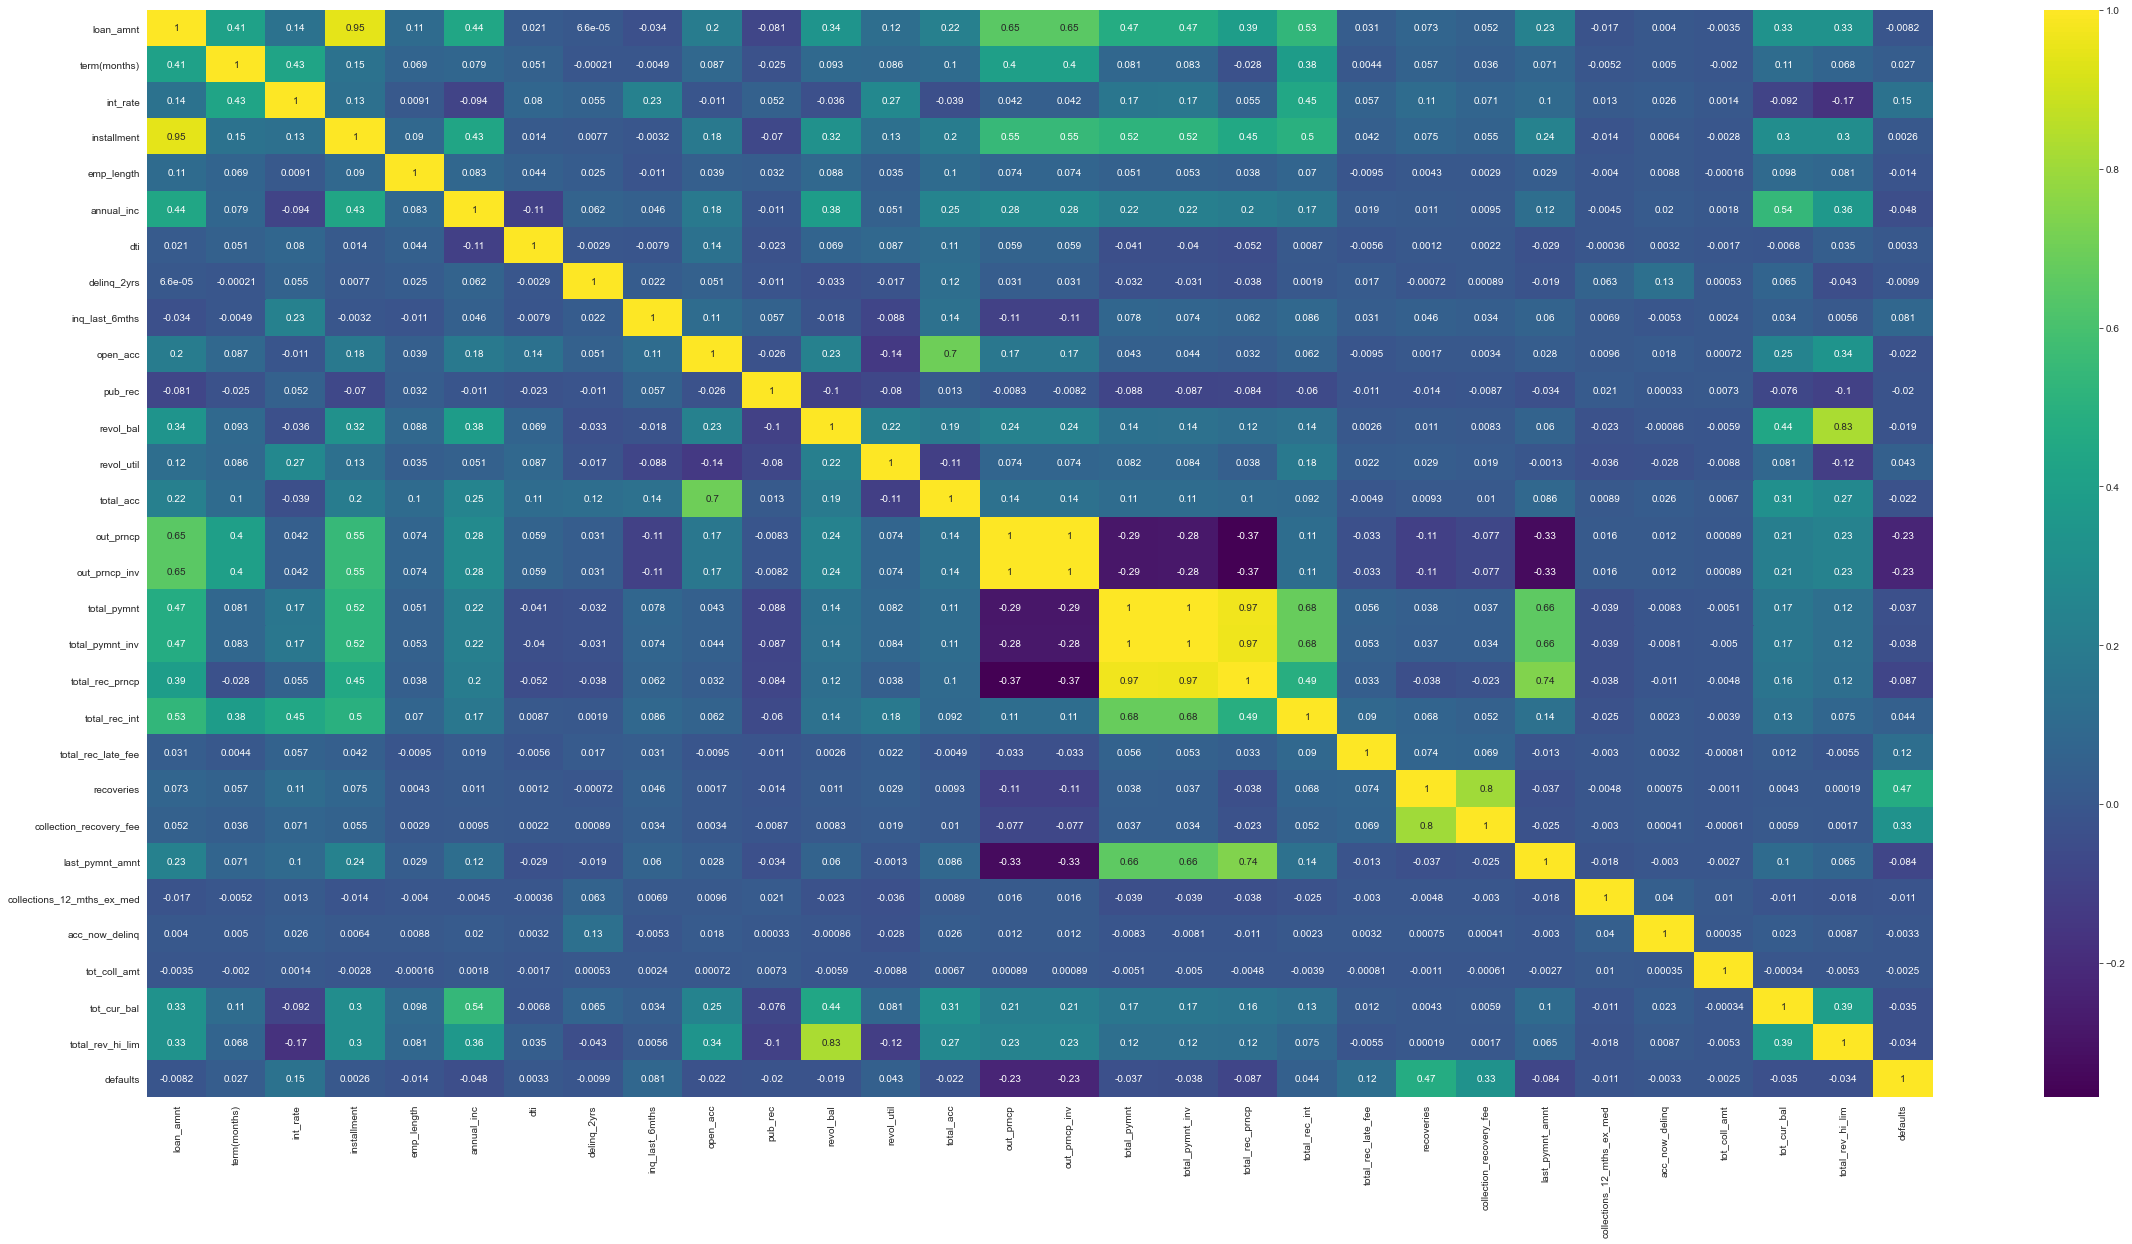

In [8]:
# create a heatmap of the continuous variables 
plt.figure(figsize=(40,20))
sns.heatmap(non_object.corr(), annot=True, cmap='viridis')
plt.show()

Looking at the heatmap, can we get rid of the installment column since it is so highly correlated with loan_amnt?

It looks like I can drop the total_payment_inv column, since it is perfectly correlated with the total_payment column.Same with out_prncp_inv and out_prncp. I will drop the columns with 'inv' since the payments to the investors will not matter for the model.

I also want to drop 'recoveries' and 'collection_recovery_fee' since these columns only apply after the loan has already defaulted. 

## 3.6 Plot the Data by Column<a id='3.6_Plot_the_Data_by_Column'></a>

### 3.6.1 loan_amnt, annual_inc, int_rate, installment<a id='3.6.1_loan_amnt,_annual_inc,_int_rate,_installment'></a>

Text(0.5, 0, 'installment')

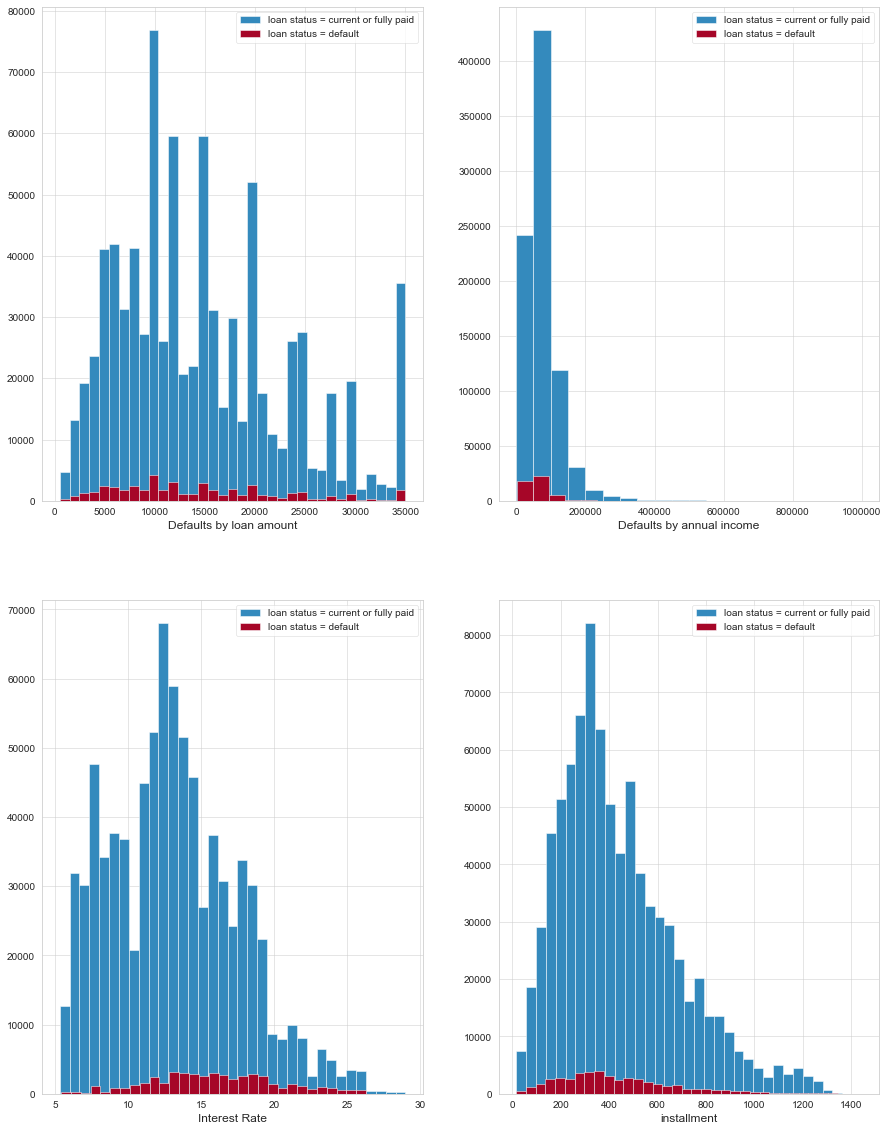

In [9]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
lc[lc['defaults'] == 0]['loan_amnt'].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['loan_amnt'].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel('Defaults by loan amount')

plt.subplot(2, 2, 2)
lc[lc['defaults'] == 0]['annual_inc'].hist(bins=20, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['annual_inc'].hist(bins=20, label='loan status = default')
plt.legend()
plt.xlabel('Defaults by annual income')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2, 2, 3)
lc[lc['defaults'] == 0]["int_rate"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["int_rate"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("Interest Rate")

plt.subplot(2, 2, 4)
lc[lc['defaults'] == 0]["installment"].hist(bins=35, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]["installment"].hist(bins=35, label='loan status = default')
plt.legend()
plt.xlabel("installment")

Text(0.5, 1.0, 'Relationship between loan amount and installment')

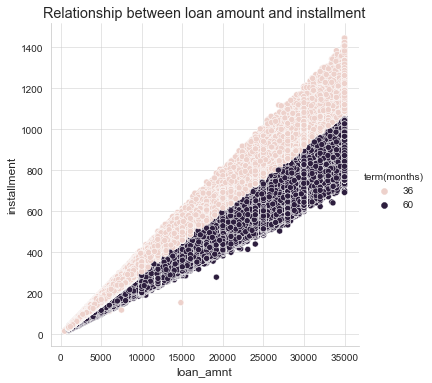

In [10]:
sns.relplot(x='loan_amnt', y='installment', hue='term(months)', data=lc)
plt.title('Relationship between loan amount and installment')

Looking at the above graph, there is a very clear relationship between loan_amnt, installment, and the loan term. I feel confident dropping this column. Lets drop 'installment', 'total_payment_inv', 'out_prncp_inv', 'recoveries' and 'collection_recovery_fee' now.

In [11]:
# dropping columns
lc.drop(['installment', 'total_pymnt_inv', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee'], axis=1, inplace=True)
lc.shape

(885132, 38)

Looking at the graphs above, it is hard to tell whether loan amount or annual income impacts whether a loan will default. Since the data is not normally distributed, I will use the Kruskal-Wallis H-test which tests the null hypothesis that the population median of all of the groups are equal.

In [60]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: loan_amnt does not impact on the default rate

sample_default = lc[lc['defaults']==1]['loan_amnt']
sample_nondefault = lc[lc['defaults']==0]['loan_amnt']

stats.kruskal(sample_default, sample_nondefault)

KruskalResult(statistic=64.11605949448835, pvalue=1.1730146668187518e-15)

In [61]:
# looking at Kruskal-Wallis statistic
# null-hypothesis: annual_inc does not impact on the default rate

annual_inc_default = lc[lc['defaults']==1]['annual_inc']
annual_inc_nondefault = lc[lc['defaults']==0]['annual_inc']

stats.kruskal(annual_inc_default, annual_inc_nondefault)

KruskalResult(statistic=3102.418270902252, pvalue=0.0)

Given the two p-values above, I reject the null-hypotheses that loan_amnt and annual_inc do not impact whether or not a loan will default.

### 3.6.2 loan_stat<a id='3.6.2_loan_stat'></a>

Text(0.5, 1.0, 'Loan Status')

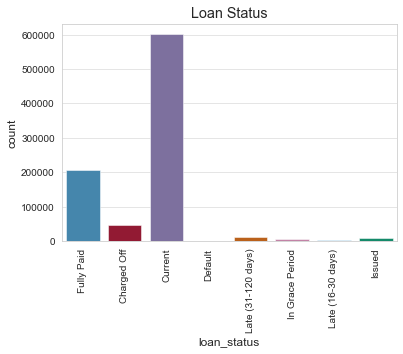

In [12]:
loan_stat = sns.countplot(x='loan_status', data=lc)
loan_stat.set_xticklabels(loan_stat.get_xticklabels(), rotation=90)
plt.title('Loan Status')

The loan_status column was used to create the defaults column ('default' and 'charged off' were both set to default). I do not feel the need to keep this column any longer. I will now drop loan_status.

In [13]:
lc.drop(['loan_status'], axis=1, inplace=True)
lc.shape

(885132, 37)

### 3.6.3 verification_status, emp_length, addr_state, purpose<a id='3.6.3_verification_status,_emp_length,_addr_state,_purpose'></a>

In [14]:
lc['emp_length'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Defaults by purpose')

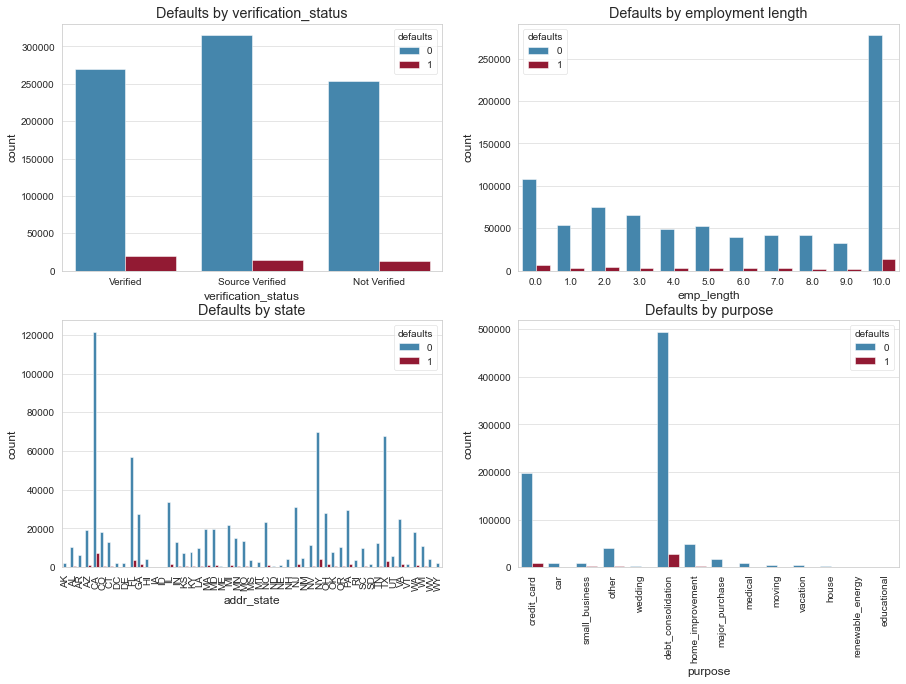

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='verification_status', data=lc, hue='defaults')
plt.title('Defaults by verification_status')

plt.subplot(2, 2, 2)
length = sorted(lc.emp_length.unique().tolist())
sns.countplot(x='emp_length', data=lc, hue='defaults', order=length)
plt.title('Defaults by employment length')

plt.subplot(2, 2, 3)
state_name = sorted(lc.addr_state.unique().tolist())
state = sns.countplot(x='addr_state', data=lc, hue='defaults', order=state_name)
state.set_xticklabels(state.get_xticklabels(), rotation=90)
plt.title('Defaults by state')

plt.subplot(2, 2, 4) 
purpose = sns.countplot(x='purpose', data=lc, hue='defaults')
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=90)
plt.title('Defaults by purpose')

Here I am going to take a closer look at the percentage of defaults per unique value in each of these columns. I will start by writing a function to do these calculations. 

In [16]:
# here I am defining a function that calculates the percentage of defaults for each unique value in a column
def percent_defaults(col):
    values = list(lc[col].unique())
    value_count = dict(lc[col].value_counts())
    default_percent = list()
    for i in range(len(values)):
        key = values[i]
        default_percent.append(lc[lc[col] == key]['defaults'].sum()/value_count[key]*100)
    return dict(zip(values, default_percent))

In [17]:
# define a function that returns the range of percentages from a column
def range_perc(col):
    dictionary = percent_defaults(col)
    key_max = max(dictionary.keys(), key=(lambda k: dictionary[k]))
    key_min = min(dictionary.keys(), key=(lambda k: dictionary[k]))
    return dictionary[key_max] - dictionary[key_min]

In [18]:
print('The range of percentages for the purpose column is: ', str(range_perc('purpose')))
print('The range of percentages for the addr_state column is: ', str(range_perc('addr_state')))
print('The range of percentages for the emp_length column is: ', str(range_perc('emp_length')))
print('The range of percentages for the verification_status column is: ', str(range_perc('verification_status')))

The range of percentages for the purpose column is:  16.078050391757785
The range of percentages for the addr_state column is:  23.076923076923077
The range of percentages for the emp_length column is:  1.8174101551740076
The range of percentages for the verification_status column is:  2.496372386542361


Here I would like to take a look at whether the percentages of defaults in employment length are significant since the range is fairly small at 4.66 - 6.47.

The null hypothesis that I would like to explore is that the number of defaults is actually evenly distributed among the different employment lengths. Since emp_length is a categorical variable, I will use the chisquare test from scipy stats. 

In [19]:
# Here I am going to separate out the lists of observed vs expected values and calculate the critical value 
tot_default_perc = lc['defaults'].sum()/len(lc)*100
emp_length_perc = percent_defaults('emp_length')
df_emp_length = pd.DataFrame(emp_length_perc, index=['percent']).T
observed = list(df_emp_length['percent'])
df_emp_length['expected'] = tot_default_perc
expected = list(df_emp_length['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df=9)
critical_value

16.918977604620448

In [20]:
# now the calculate the chisquare
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=0.5846642366330316, pvalue=0.9999860434801894)

Given that the chisquare statistic is not greater than the critical value and the p-value is 0.99, I cannot reject the null hypothesis. In this case, I am going to chose to drop the emp_length column.

In [21]:
# dropping emp_length column
lc.drop(['emp_length'], axis=1, inplace=True)

### 3.6.4 grade, sub_grade, term(months), home_ownership<a id='3.6.4_grade,_sub_grade,_term(months),_home_ownership'></a>

Text(0.5, 1.0, 'Defaults by home type')

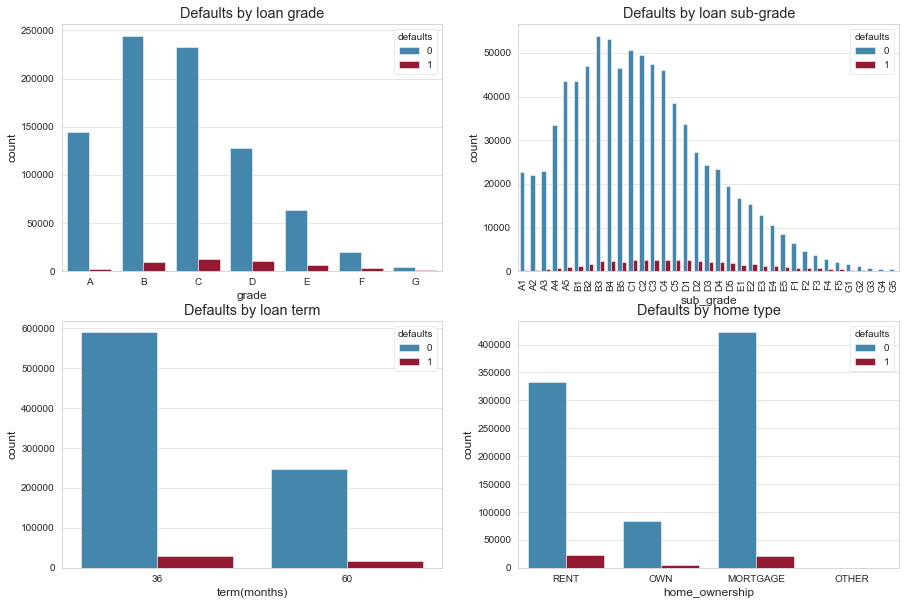

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc.grade.unique().tolist())
sns.countplot(x='grade', data=lc, hue='defaults', order=grade)
plt.title('Defaults by loan grade')

plt.subplot(2, 2, 2)
sub_grade = sorted(lc.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc, hue='defaults', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title('Defaults by loan sub-grade')

plt.subplot(2, 2, 3)
sns.countplot(x='term(months)', data=lc, hue='defaults')
plt.title('Defaults by loan term')

plt.subplot(2, 2, 4)
sns.countplot(x='home_ownership', data=lc, hue='defaults')
plt.title('Defaults by home type')

In [23]:
range_perc('grade')

14.255665128628541

In [24]:
range_perc('sub_grade')

17.667400864153

In [25]:
range_perc('term(months)')

1.3429784641385103

In [26]:
range_perc('home_ownership')

15.179048675515682

In [27]:
# Here I am going to separate out the lists of observed vs expected values for the percentages in term(months) and 
# calculate the critical value 
tot_default_perc = lc['defaults'].sum()/len(lc)*100
term_perc = percent_defaults('term(months)')
df_term = pd.DataFrame(term_perc, index=['percent']).T
observed = list(df_term['percent'])
df_term['expected'] = tot_default_perc
expected = list(df_term['expected'])
critical_value = stats.chi2.ppf(q = 0.95, df=(len(df_term)-1))
critical_value

3.841458820694124

In [28]:
# now the calculate the chisquare
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=0.19779556881773955, pvalue=0.6565061141141446)

Given that the chisquare statistic is not greater than the critical value and the p-value is 0.65, I cannot reject the null hypothesis. In this case, I am going to chose to drop the term(months) column.

Also, since grade is a more general sub_grade, I am going to drop the grade column.

In [29]:
# dropping term(months) and grade columns
lc.drop(['term(months)', 'grade'], axis=1, inplace=True)
lc.shape

(885132, 34)

### 3.6.5 initial_list_status, tot_cur_bal, dti, out_prncp<a id='3.6.5_initial_list_status,_tot_cur_bal,_dti,_out_prncp'></a>

Text(0, 0.5, 'Loan count')

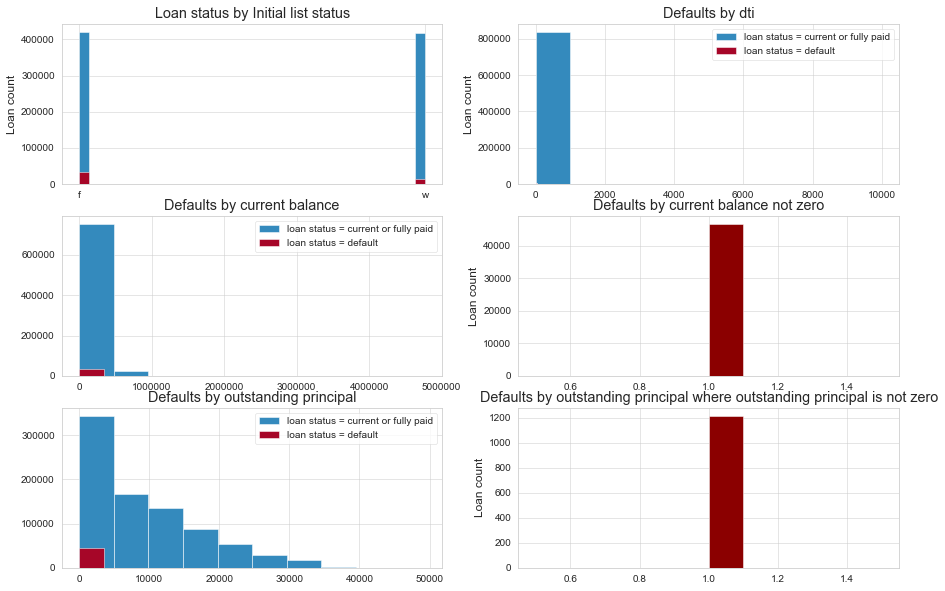

In [30]:
plt.figure(figsize=(15, 10))
plt.tight_layout()

plt.subplot(3, 2, 1)
lc[lc['defaults'] == 0]['initial_list_status'].hist(bins=35, label='loan status = current or fully paid') 
lc[lc['defaults'] == 1]['initial_list_status'].hist(bins=35, label='loan status = default') 
plt.title('Loan status by Initial list status')
plt.ylabel('Loan count')

plt.subplot(3, 2, 2)
lc[lc['defaults'] == 0]['dti'].hist(bins=10, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['dti'].hist(bins=10, label='loan status = default')
plt.legend()
plt.ylabel('Loan count')
plt.title('Defaults by dti')

plt.subplot(3, 2, 3)
lc[lc['defaults'] == 0]['tot_cur_bal'].hist(bins=10, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['tot_cur_bal'].hist(bins=10, label='loan status = default')
plt.legend()
plt.title('Defaults by current balance')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(3, 2, 4)
df_tot_cur_bal = lc[lc.tot_cur_bal != 0]['defaults']
df_tot_cur_bal[df_tot_cur_bal != 0].hist(color='darkred')
plt.title('Defaults by current balance not zero')
plt.ylabel('Loan count')

plt.subplot(3, 2, 5)
lc[lc['defaults'] == 0]['out_prncp'].hist(bins=10, label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['out_prncp'].hist(bins=10, label='loan status = default')
plt.legend()
plt.title('Defaults by outstanding principal')

plt.subplot(3, 2, 6)
df_out_prncp = lc[lc.out_prncp != 0]['defaults']
df_out_prncp[df_out_prncp != 0].hist(color='darkred')
plt.title('Defaults by outstanding principal where outstanding principal is not zero')
plt.ylabel('Loan count')

In [31]:
lc.dti.nunique()

4086

In [32]:
#initial_list_status, tot_cur_bal, dti, out_prncp
print(range_perc('initial_list_status'))
#print(range_perc('tot_cur_bal'))
print(range_perc('dti'))
#print(range_perc('out_prncp'))

4.48582347448641
27.27272727272727


### 3.6.6 tot_coll_amt<a id='3.6.6_tot_coll_amt'></a>

Text(0.5, 1.0, 'Defaults by total collection amounts ever owed non zero')

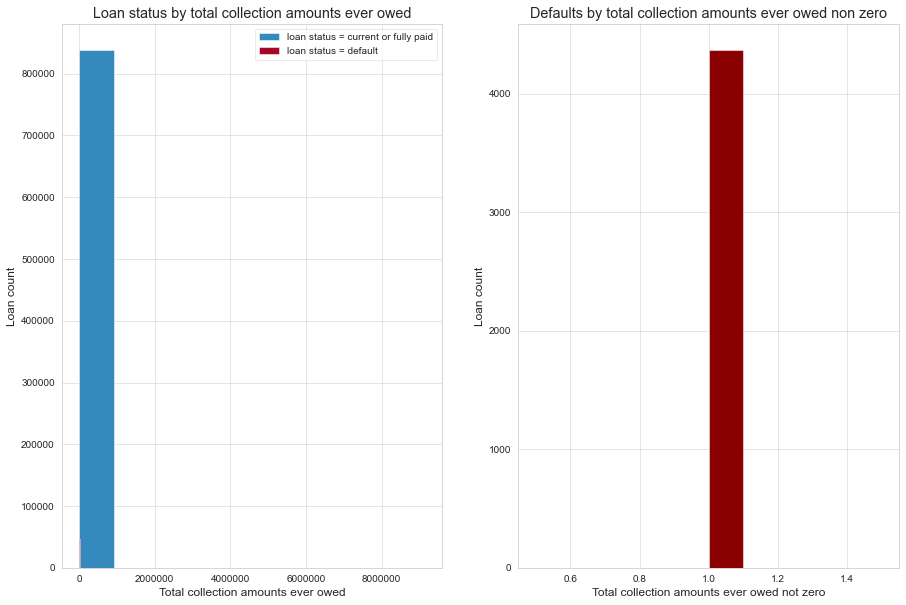

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc["defaults"] == 0]['tot_coll_amt'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['tot_coll_amt'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total collection amounts ever owed')
plt.ylabel('Loan count')
plt.title('Loan status by total collection amounts ever owed')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(1,2,2)
df_tot_coll_amt = lc[lc.tot_coll_amt != 0]['defaults']
df_tot_coll_amt[df_tot_coll_amt != 0].hist(color='darkred')
plt.xlabel('Total collection amounts ever owed not zero')
plt.ylabel('Loan count')
plt.title('Defaults by total collection amounts ever owed non zero')

Here I would like to zoom in on the collection amounts under 20,000 since it is hard to see the data in that range.

(0.0, 20000.0, 0.0, 10000.0)

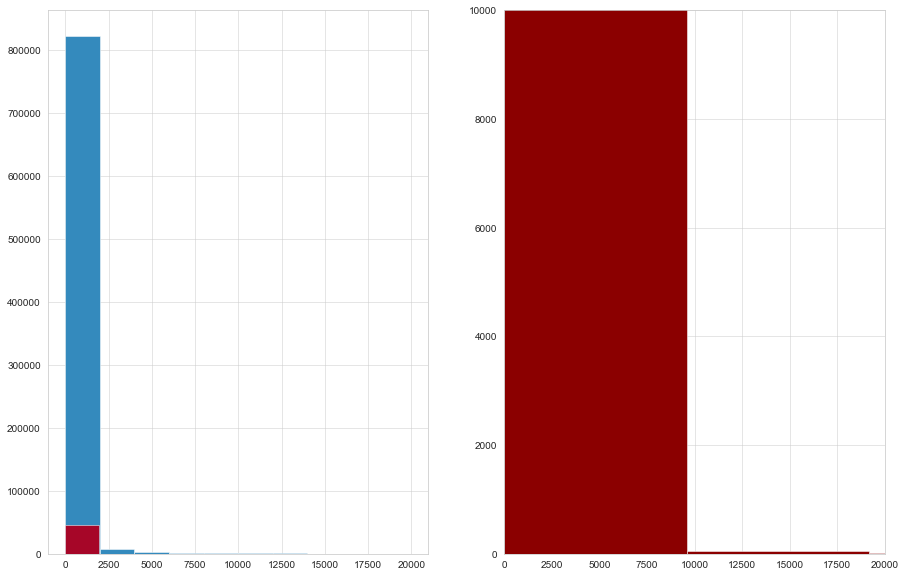

In [34]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
tca = lc[lc.tot_coll_amt < 20000]
tca[tca["defaults"] == 0]['tot_coll_amt'].hist(label='loan status = current or fully paid')
tca[tca["defaults"] == 1]['tot_coll_amt'].hist(label='loan status = default')

plt.subplot(1,2,2)
lc[lc["defaults"] == 1]['tot_coll_amt'].hist(label='loan status = default', color='darkred')
plt.axis([0,20000,0, 10000])

Now you can see that there are defaults at amounts that are not zero. 

### 3.6.7 acc_now_delinq, delinq_2yrs<a id='3.6.7_acc_now_delinq,_delinq_2yrs'></a>

In [35]:
acc_now_delinq_perc = percent_defaults('acc_now_delinq')
df_acc_now_delinq = pd.DataFrame(acc_now_delinq_perc, index=['percentage'])
df_acc_now_delinq = df_acc_now_delinq.T

In [36]:
delinq_2yrs_perc = percent_defaults('delinq_2yrs')
df_delinq_2yrs = pd.DataFrame(delinq_2yrs_perc, index=['percentage']).T

Text(0.5, 1.0, 'Percentage of 30+ day delinquencies that defaulted')

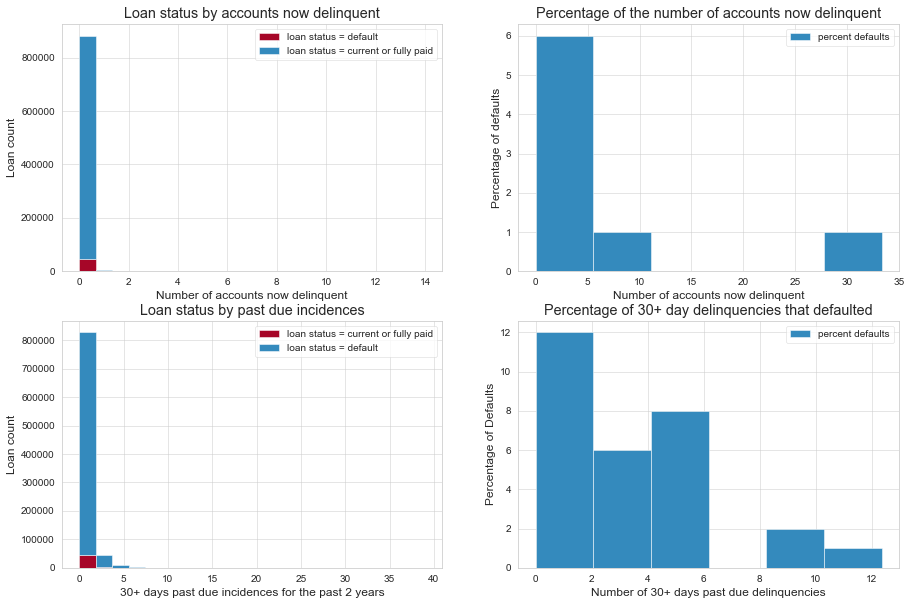

In [37]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.histplot(data=lc, x='acc_now_delinq', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by accounts now delinquent')
plt.xlabel('Number of accounts now delinquent')
plt.ylabel('Loan count')

plt.subplot(2,2,2)
sns.histplot(data=df_acc_now_delinq, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of accounts now delinquent')
plt.ylabel('Percentage of defaults')
plt.title('Percentage of the number of accounts now delinquent')

plt.subplot(2,2,3)
sns.histplot(data=lc, x='delinq_2yrs', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.title('Loan status by past due incidences')
plt.ylabel('Loan count')
plt.xlabel('30+ days past due incidences for the past 2 years')
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')

plt.subplot(2,2,4)
sns.histplot(data=df_delinq_2yrs, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of 30+ days past due delinquencies')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of 30+ day delinquencies that defaulted')

### 3.6.8 inq_last_6mths, pub_rec<a id='3.6.8_inq_last_6mths,_pub_rec'></a>

In [38]:
pub_rec_perc = percent_defaults('pub_rec')
df_pub_rec = pd.DataFrame(pub_rec_perc, index=['percentage']).T

In [39]:
inq_last_6mths_perc = percent_defaults('inq_last_6mths')
df_inq_last_6mths = pd.DataFrame(inq_last_6mths_perc, index=['percentage']).T

Text(0.5, 0, 'Percentage of derogatory public records that defaulted')

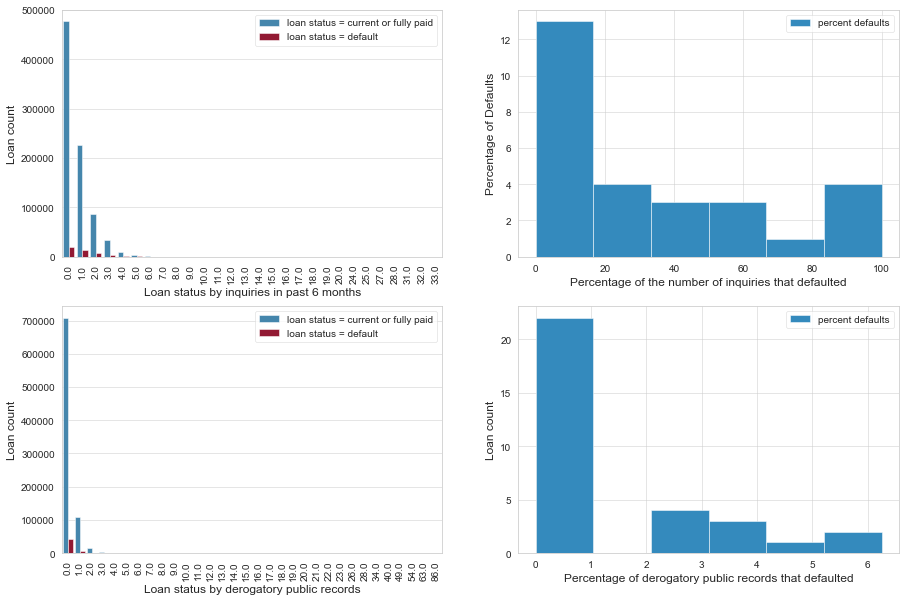

In [40]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
g = sns.countplot(x='inq_last_6mths', data=lc, hue='defaults')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by inquiries in past 6 months')

plt.subplot(2,2,2)
sns.histplot(data=df_inq_last_6mths, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.ylabel('Percentage of Defaults')
plt.xlabel('Percentage of the number of inquiries that defaulted')

plt.subplot(2,2,3)
p = sns.countplot(x='pub_rec', data=lc, hue='defaults')
p.set_xticklabels(p.get_xticklabels(), rotation=90);
plt.legend(['loan status = current or fully paid', 'loan status = default'], loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Loan status by derogatory public records')

plt.subplot(2,2,4)
sns.histplot(data=df_pub_rec, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.ylabel('Loan count')
plt.xlabel('Percentage of derogatory public records that defaulted')

### 3.6.9 collections_12_mths_ex_med<a id='3.6.9_collections_12_mths_ex_med'></a>

In [41]:
collections_12_mths_ex_med_perc = percent_defaults('collections_12_mths_ex_med')
df_collections_12_mths_ex_med = pd.DataFrame(collections_12_mths_ex_med_perc, index=['percentage']).T

Text(0.5, 1.0, 'Percentage of the number of collections that defaulted')

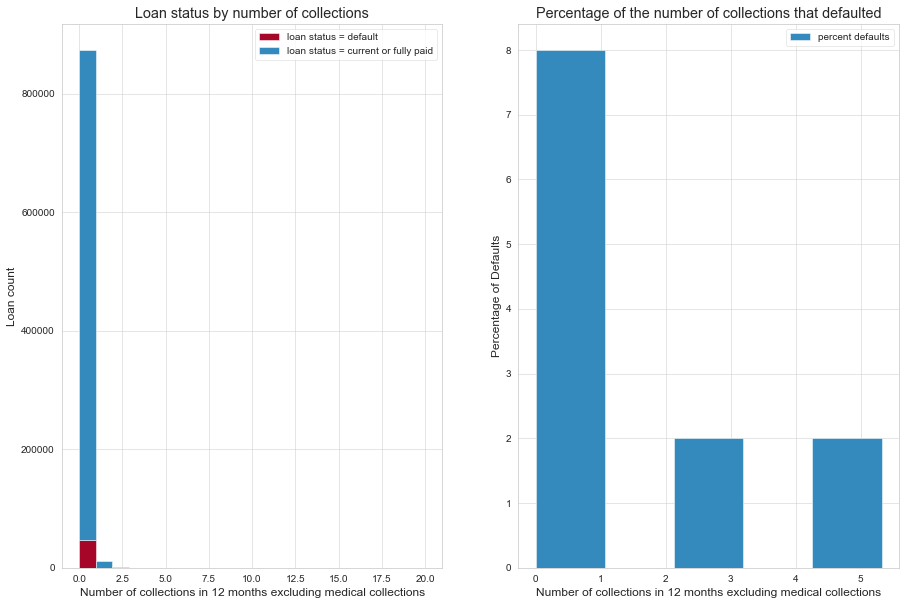

In [42]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
sns.histplot(data=lc, x='collections_12_mths_ex_med', stat='count', hue='defaults', multiple='stack', alpha=1)
plt.legend(['loan status = default', 'loan status = current or fully paid'], loc='upper right')
plt.title('Loan status by number of collections')
plt.xlabel('Number of collections in 12 months excluding medical collections')
plt.ylabel('Loan count')

plt.subplot(1,2,2)
sns.histplot(data=df_collections_12_mths_ex_med, label='percent defaults', color='darkred', alpha=1)
plt.legend(loc='upper right')
plt.xlabel('Number of collections in 12 months excluding medical collections')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of the number of collections that defaulted')

### 3.6.10 open_acc, total_acc, total_pymnt<a id='3.6.10_open_acc,_total_acc,_total_pymnt'></a>

Text(0.5, 0, 'Defaults by payments received to date')

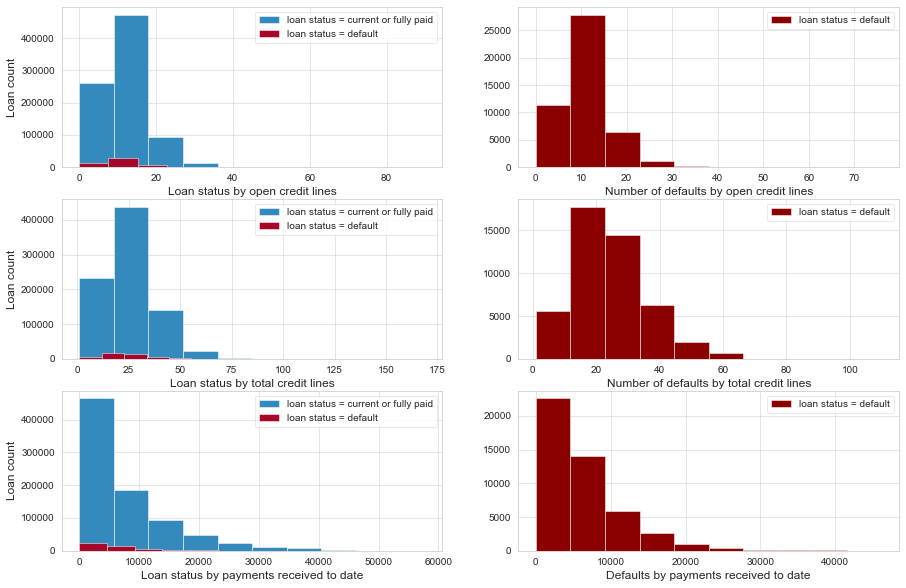

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(3,2,1)
lc[lc["defaults"] == 0]['open_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by open credit lines')
plt.ylabel('Loan count')

plt.subplot(3,2,2)
lc[lc["defaults"] == 1]['open_acc'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Number of defaults by open credit lines')

plt.subplot(3,2,3)
lc[lc["defaults"] == 0]['total_acc'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by total credit lines')
plt.ylabel('Loan count')

plt.subplot(3,2,4)
lc[lc["defaults"] == 1]['total_acc'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Number of defaults by total credit lines')

plt.subplot(3,2,5)
lc[lc["defaults"] == 0]['total_pymnt'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_pymnt'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Loan status by payments received to date')
plt.ylabel('Loan count')

plt.subplot(3,2,6)
lc[lc["defaults"] == 1]['total_pymnt'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Defaults by payments received to date')

The graphs of the defaults closely resemble the graphs of 'open_acc', 'total_acc', and 'total_pymnt'. Let's take a closer look at the range of the default percentages.

In [44]:
range_perc('open_acc')

50.0

In [45]:
range_perc('total_acc')

25.0

Text(0.5, 1.0, 'Probability of loan status by payments received to date')

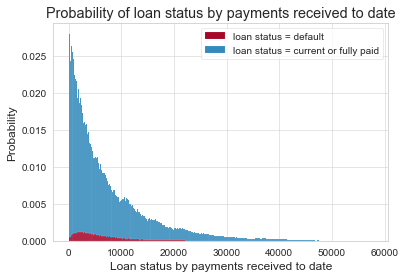

In [46]:
sns.histplot(data=lc, x='total_pymnt', stat='probability', hue='defaults', alpha=1, multiple='stack')
plt.legend(['loan status = default', 'loan status = current or fully paid'])
plt.xlabel('Loan status by payments received to date')
plt.title('Probability of loan status by payments received to date')

As you can see, by the range of percentages, defaults are not evenly spread out across open_acc, total_acc, and total_pymnt

### 3.6.11 total_rec_prncp, last_pymnt_amnt<a id='3.6.11_total_rec_prncp,_last_pymnt_amnt'></a>

Text(0.5, 1.0, 'Defaults by last payment amount')

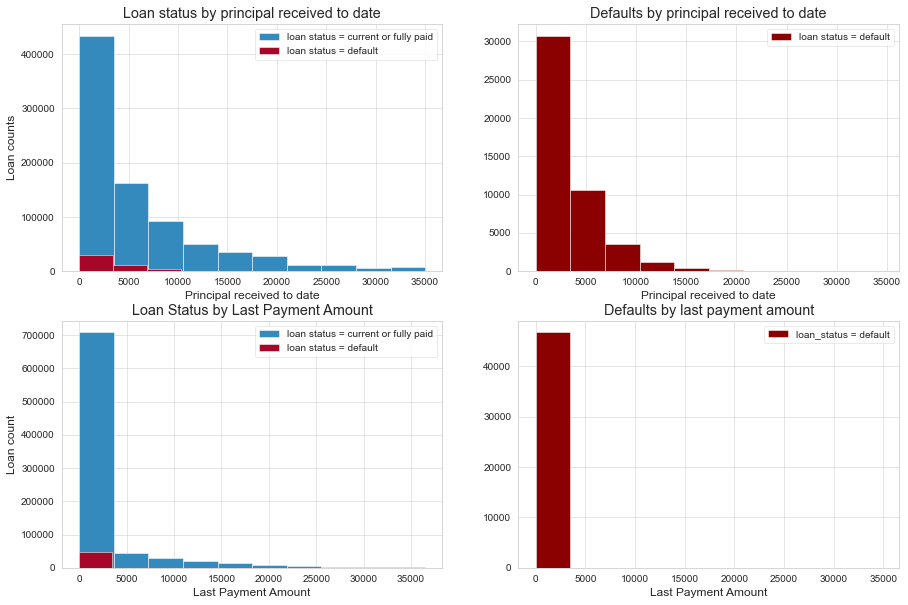

In [47]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc["defaults"] == 0]['total_rec_prncp'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_rec_prncp'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Principal received to date')
plt.ylabel('Loan counts')
plt.title('Loan status by principal received to date')

plt.subplot(2,2,2)
lc[lc["defaults"] == 1]['total_rec_prncp'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Principal received to date')
plt.title('Defaults by principal received to date')

plt.subplot(2,2,3)
lc[lc["defaults"] == 0]['last_pymnt_amnt'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['last_pymnt_amnt'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Last Payment Amount')
plt.ylabel('Loan count')
plt.title('Loan Status by Last Payment Amount')

plt.subplot(2,2,4)
lc[lc["defaults"] == 1]['last_pymnt_amnt'].hist(label='loan_status = default', color='darkred')
plt.legend()
plt.xlabel('Last Payment Amount')
plt.title('Defaults by last payment amount')

The total_rec_prncp and last_pymnt_amnt columns may be better visualized with a different plot

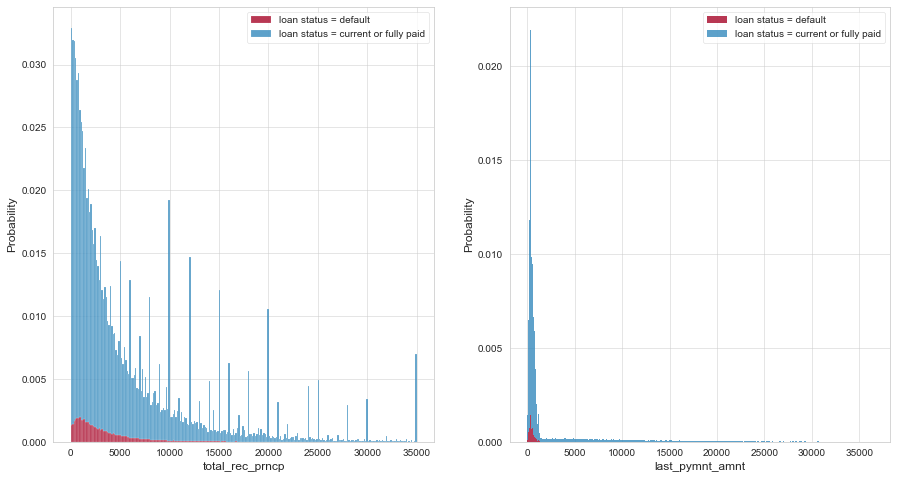

In [48]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.histplot(data=lc, x='total_rec_prncp', stat='probability', hue='defaults', alpha=0.8, multiple='stack')
plt.legend(['loan status = default', 'loan status = current or fully paid'])

plt.subplot(1,2,2)
sns.histplot(data=lc, x='last_pymnt_amnt', stat='probability', hue='defaults', alpha=0.8, multiple='stack')
plt.legend(['loan status = default', 'loan status = current or fully paid'])

### 3.6.12 total_rec_late_fee, total_rec_int<a id='3.6.12_total_rec_late_fee,_total_rec_int'></a>

Text(0.5, 1.0, 'Defaults by interest received to date')

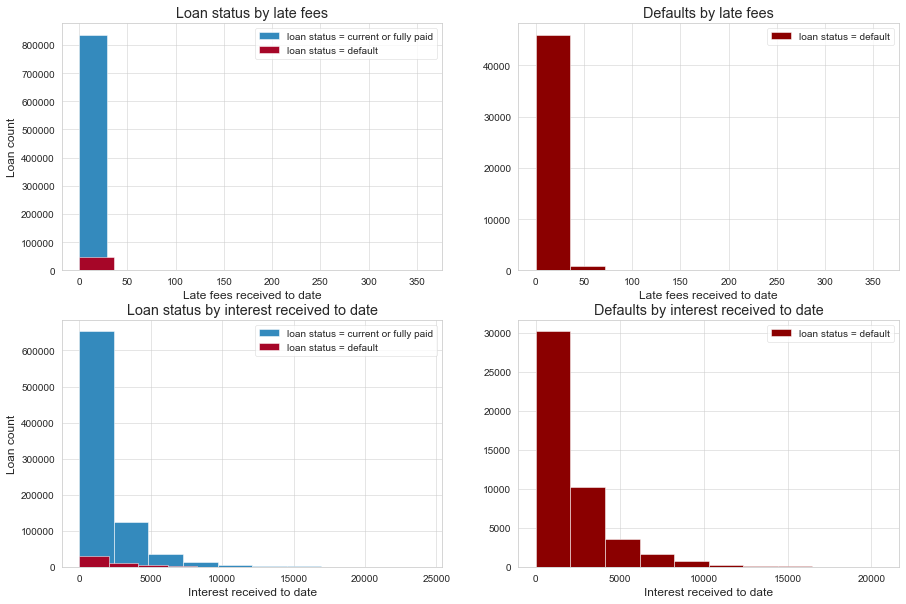

In [49]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc["defaults"] == 0]['total_rec_late_fee'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_rec_late_fee'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Late fees received to date')
plt.ylabel('Loan count')
plt.title('Loan status by late fees')

plt.subplot(2,2,2)
lc[lc["defaults"] == 1]['total_rec_late_fee'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Late fees received to date')
plt.title('Defaults by late fees')

plt.subplot(2,2,3)
lc[lc["defaults"] == 0]['total_rec_int'].hist(label='loan status = current or fully paid')
lc[lc["defaults"] == 1]['total_rec_int'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Interest received to date')
plt.ylabel('Loan count')
plt.title('Loan status by interest received to date')

plt.subplot(2,2,4)
lc[lc["defaults"] == 1]['total_rec_int'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Interest received to date')
plt.title('Defaults by interest received to date')

### 3.6.13 revol_bal<a id='3.6.14_revol_bal'></a>

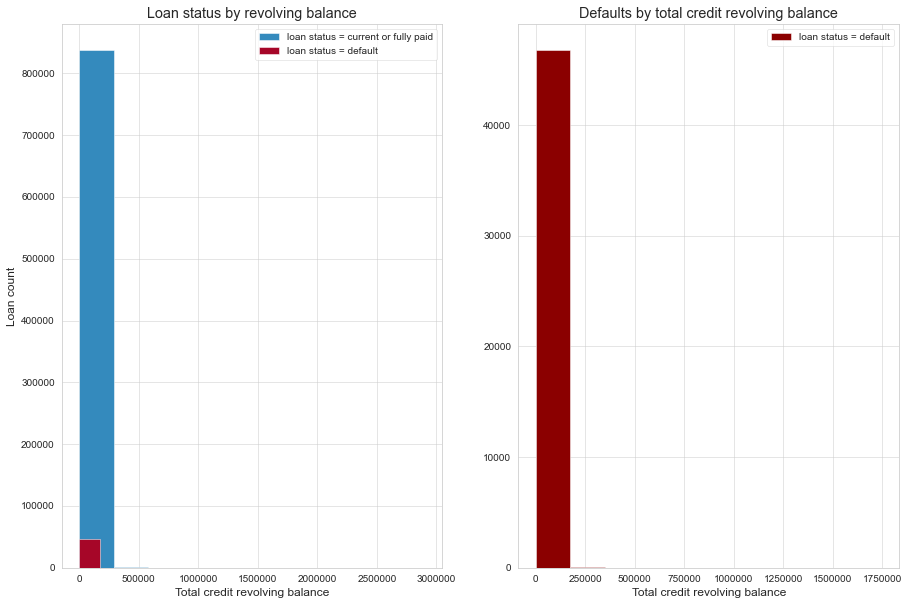

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['revol_bal'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['revol_bal'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.ylabel('Loan count')
plt.title('Loan status by revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(1,2,2)
lc[lc['defaults'] == 1]['revol_bal'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Total credit revolving balance')
plt.title('Defaults by total credit revolving balance')
plt.ticklabel_format(useOffset=False, style='plain')

In [51]:
lc['revol_bal'].describe()

count    8.851320e+05
mean     1.689822e+04
std      2.213290e+04
min      0.000000e+00
25%      6.443000e+03
50%      1.187000e+04
75%      2.081900e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

### 3.6.14 total_rev_hi_lim, revol_util<a id='3.6.14_total_rev_hi_lim,_revol_util'></a>

Text(0.5, 1.0, 'Number of defaults by revolving line utilization rate')

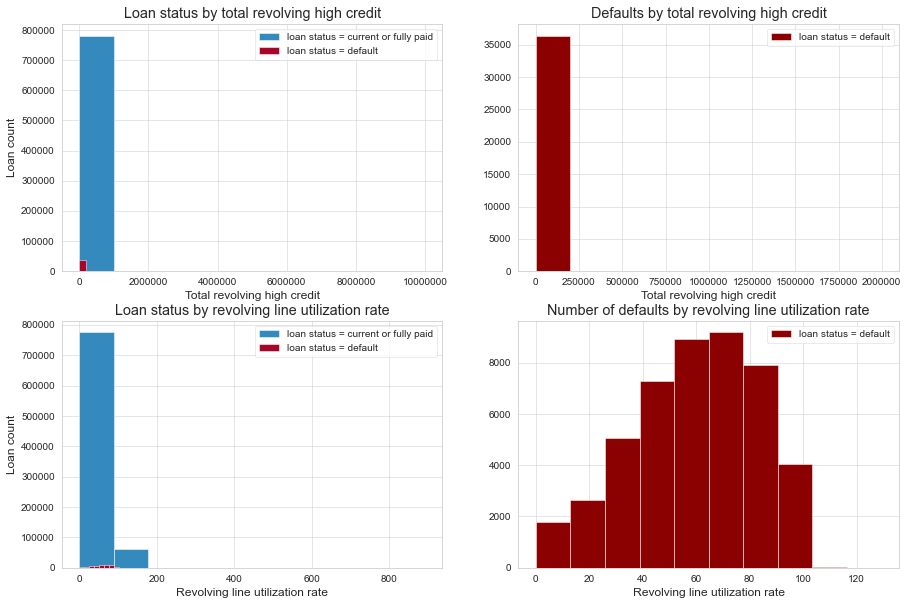

In [52]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['total_rev_hi_lim'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['total_rev_hi_lim'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Total revolving high credit')
plt.ylabel('Loan count')
plt.title('Loan status by total revolving high credit')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['total_rev_hi_lim'].hist(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Total revolving high credit')
plt.title('Defaults by total revolving high credit')
plt.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['revol_util'].hist(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default')
plt.legend()
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Loan count')
plt.title('Loan status by revolving line utilization rate')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['revol_util'].hist(label='loan status = default', color='darkred')
plt.legend(loc='upper right')
plt.xlabel('Revolving line utilization rate')
plt.title('Number of defaults by revolving line utilization rate')

In [53]:
lc.groupby(by='defaults')['total_rev_hi_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,780502.0,32301.386615,36116.031443,0.0,14000.0,23900.0,40100.0,9999999.0
1,36427.0,26402.654295,25419.560247,0.0,12400.0,20500.0,33200.0,1998700.0


Text(0.5, 1.0, 'total revolving high credit boxplots')

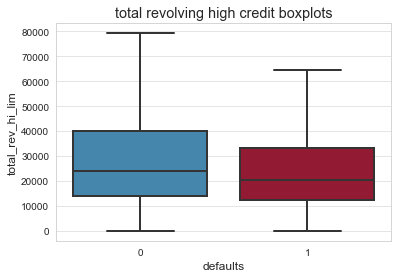

In [54]:
sns.boxplot(x='defaults', y='total_rev_hi_lim', data=lc, showfliers=False)
plt.title('total revolving high credit boxplots')

### 3.6.15 issue_d, last_credit_pull_d<a id='3.6.15_issue_d,_last_credit_pull_d'></a>

Text(0.5, 1.0, 'Defaults by last credit pull date')

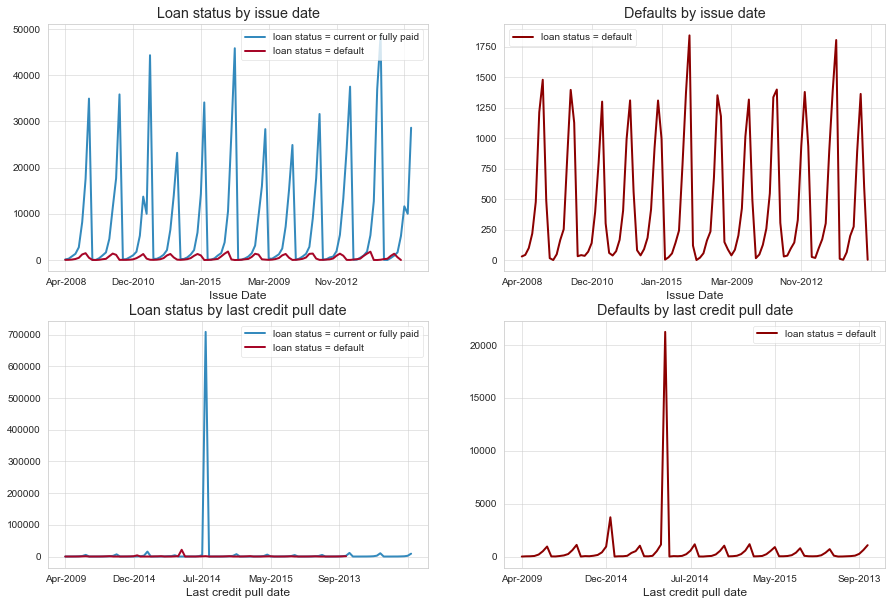

In [55]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['issue_d'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['issue_d'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Issue Date')
plt.title('Loan status by issue date')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['issue_d'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Issue Date')
plt.title('Defaults by issue date')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Loan status by last credit pull date')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['last_credit_pull_d'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Last credit pull date')
plt.title('Defaults by last credit pull date')

### 3.6.16 earliest_cr_line, next_pymnt_d<a id='3.6.16_earliest_cr_line,_next_pymnt_d'></a>

Text(0.5, 1.0, 'Defaults by next payment date')

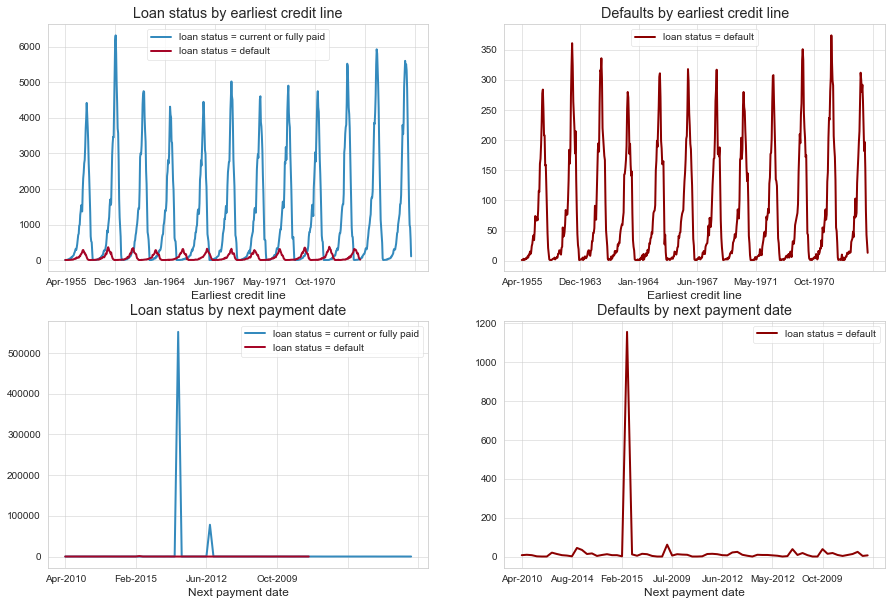

In [56]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
lc[lc['defaults'] == 0]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Loan status by earliest credit line')

plt.subplot(2,2,2)
lc[lc['defaults'] == 1]['earliest_cr_line'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Earliest credit line')
plt.title('Defaults by earliest credit line')

plt.subplot(2,2,3)
lc[lc['defaults'] == 0]['next_pymnt_d'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['next_pymnt_d'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Next payment date')
plt.title('Loan status by next payment date')

plt.subplot(2,2,4)
lc[lc['defaults'] == 1]['next_pymnt_d'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Next payment date')
plt.title('Defaults by next payment date')

### 3.6.17 last_pymnt_d<a id='3.6.17_last_pymnt_d'></a>

Text(0.5, 1.0, 'Defaults by last payment date')

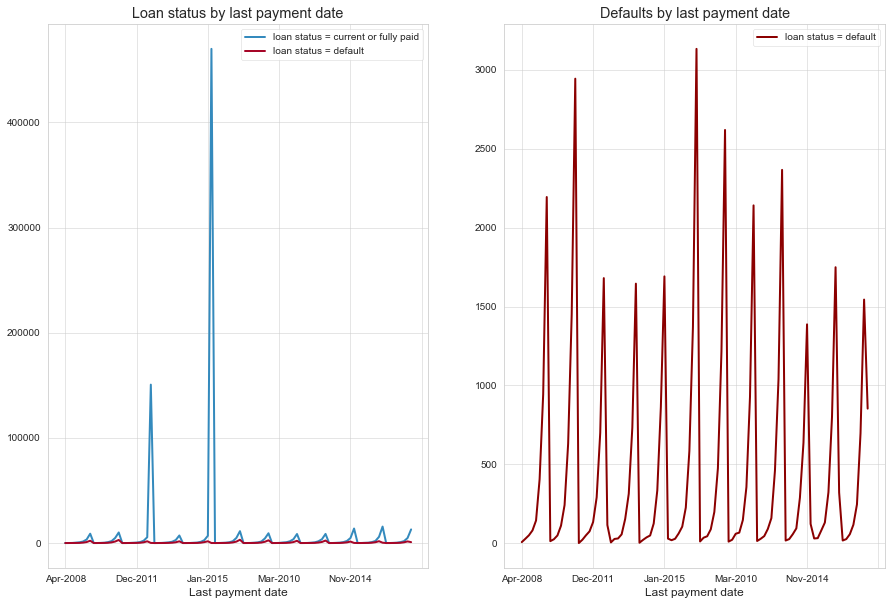

In [57]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
lc[lc['defaults'] == 0]['last_pymnt_d'].value_counts().sort_index().plot(label='loan status = current or fully paid')
lc[lc['defaults'] == 1]['last_pymnt_d'].value_counts().sort_index().plot(label='loan status = default')
plt.legend()
plt.xlabel('Last payment date')
plt.title('Loan status by last payment date')

plt.subplot(1,2,2)
lc[lc['defaults'] == 1]['last_pymnt_d'].value_counts().sort_index().plot(label='loan status = default', color='darkred')
plt.legend()
plt.xlabel('Last payment date')
plt.title('Defaults by last payment date')

## 3.7 Summary<a id='3.7_Summary'></a>

In [58]:
lc.shape

(885132, 34)

The data set has been further explored and cleaned. It is down to 34 columns, from 43, that all appear to impact whether or not a loan will default. The columns out_prncp, int_rate, and total_rec_late_fee have the greatest correlations to the default column.

In [59]:
# save the data
lc.to_csv('lc_step3.csv')